## Chapter 3: Derivatives and Automatic Differentiation

# 3.8 Automatic differentiation for multi-input functions 

Automatic differentiation, discussed previously for mathematical functions with single input, can be easily extended to handle functions with multiple inputs. The only difference is now, going forward through the computational graph, at each node we compute and store the full gradient vector (instead a single derivative).    

#### <span style="color:#a50e3e;">Example 1. </span> Computing the gradient of a simple quadratic using the forward mode

We first decompose the quadratic function $w_1^2+w_2^2$ into its computational graph.

<p><img src="../../mlrefined_images/calculus_images/quad_0.png" width="65%" height="auto"></p>

Starting from node $a$, we compute the partial derivatives of $a\left(w_1\right)=w_1^2$ with respect to both $w_1$ and $w_2$

\begin{equation}
\frac{\partial}{\partial w_{1}}a = 2w_1\\
\frac{\partial}{\partial w_{2}}a = 0
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/quad_1.png" width="65%" height="auto"></p>

Similarly, we can compute the partial derivatives of $b\left(w_1\right)=w_2^2$ with respect to $w_1$ and $w_2$, as 

\begin{equation}
\frac{\partial}{\partial w_{1}}b = 0\\
\frac{\partial}{\partial w_{2}}b = 2w_2
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/quad_2.png" width="65%" height="auto"></p>

Finally, the partial derivatives of $c(a,b)=a+b$ with respect to $w_1$ and $w_2$ are computed via the chain rule as 

\begin{equation}
\frac{\partial}{\partial w_{1}}c = \frac{\partial}{\partial a}c\,\frac{\partial}{\partial w_{1}}a+\frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{1}}b = 1 \times 2w_1 + 1 \times 0 = 2w_1\\
\frac{\partial}{\partial w_{2}}c = \frac{\partial}{\partial a}c\,\frac{\partial}{\partial w_{2}}a+\frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{2}}b = 1 \times 0 + 1 \times 2w_2 = 2w_2  
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/quad_3.png" width="65%" height="auto"></p>

#### <span style="color:#a50e3e;">Example 2. </span> Computing the gradient of a multi-input function using the forward mode

In this Example we illustrate how to compute the gradient of $\text{tanh}\left(w_4+w_3\text{tanh}\left(w_2+w_1\right)\right)$, a function with four input variables, using its computational graph shown below.

<p><img src="../../mlrefined_images/calculus_images/2layer_0.png" width="75%" height="auto"></p>

Our goal here is to compute $\nabla \, e=\left[
\frac{\partial}{\partial w_{1}}e,
\frac{\partial}{\partial w_{2}}e,
\frac{\partial}{\partial w_{3}}e,
\frac{\partial}{\partial w_{4}}e
\right]$. 

Starting from node $a$, having nodes $w_1$ and $w_2$ as its children, we compute the partial derivatives of $a\left(w_1,w_2\right)=w_1+w_2$ with respect to all four input variables, giving

\begin{equation}
\frac{\partial}{\partial w_{1}}a = w_2\\
\frac{\partial}{\partial w_{2}}a = w_1\\
\frac{\partial}{\partial w_{3}}a = 0\\
\frac{\partial}{\partial w_{4}}a = 0
\end{equation}


or, more compactly, $\nabla \, a=\left[
w_2,
w_1,
0,
0
\right]$. 

<p><img src="../../mlrefined_images/calculus_images/2layer_1.png" width="75%" height="auto"></p>

Moving forward to the next parent node $b(a) = \text{tanh}\left(a\right)$ we compute the partial derivative of $b$ with respect to all input variables

\begin{equation}
\frac{\partial}{\partial w_{1}}b = \frac{\partial}{\partial a}b\,\frac{\partial}{\partial w_{1}}a=\left(1-\text{tanh}^2(a)\right)w_2\\
\frac{\partial}{\partial w_{2}}b = \frac{\partial}{\partial a}b\,\frac{\partial}{\partial w_{2}}a=\left(1-\text{tanh}^2(a)\right)w_1\\
\frac{\partial}{\partial w_{3}}b = \frac{\partial}{\partial a}b\,\frac{\partial}{\partial w_{3}}a=\left(1-\text{tanh}^2(a)\right)\times 0=0\\
\frac{\partial}{\partial w_{4}}b = \frac{\partial}{\partial a}b\,\frac{\partial}{\partial w_{4}}a=\left(1-\text{tanh}^2(a)\right)\times 0=0
\end{equation}

represented more compactly via $\nabla \, b=\left[
\left(1-\text{tanh}^2(a)\right)w_2,
\left(1-\text{tanh}^2(a)\right)w_1,
0,
0
\right]$. 

<p><img src="../../mlrefined_images/calculus_images/2layer_2.png" width="75%" height="auto"></p>

Next, looking back at the graph, we see the next parent node is $c(b,w_3) = b\,w_3$.  

Writing out its partial derivatives with respect to $w_1$ through $w_4$ we have


\begin{equation}
\frac{\partial}{\partial w_{1}}c = \frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{1}}b+\frac{\partial}{\partial w_3}c\,\frac{\partial}{\partial w_{1}}w_3=w_3 \times \left(1-\text{tanh}^2(a)\right)w_2 + b \times 0 = w_3 \left(1-\text{tanh}^2(a)\right)w_2 \\
\frac{\partial}{\partial w_{2}}c = \frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{2}}b+\frac{\partial}{\partial w_3}c\,\frac{\partial}{\partial w_{2}}w_3= w_3 \times \left(1-\text{tanh}^2(a)\right)w_1 + b \times 0 =w_3\left(1-\text{tanh}^2(a)\right)w_1\\
\frac{\partial}{\partial w_{3}}c = \frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{3}}b+\frac{\partial}{\partial w_3}c\,\frac{\partial}{\partial w_{3}}w_3 = w_3 \times 0 + b \times 1 = b\\
\frac{\partial}{\partial w_{4}}c = \frac{\partial}{\partial b}c\,\frac{\partial}{\partial w_{4}}b+\frac{\partial}{\partial w_3}c\,\frac{\partial}{\partial w_{4}}w_3 = w_3 \times 0 + b \times 0 = 0 
\end{equation}

or, put together, $\nabla \, c=\left[
w_3 \left(1-\text{tanh}^2(a)\right)w_2,
w_3\left(1-\text{tanh}^2(a)\right)w_1,
b,
0
\right]$.  

<p><img src="../../mlrefined_images/calculus_images/2layer_3.png" width="75%" height="auto"></p>

Next, we have $d(c,w_4) = c+w_4$, with its gradient computed as 

\begin{equation}
\frac{\partial}{\partial w_{1}}d = \frac{\partial}{\partial c}d\,\frac{\partial}{\partial w_{1}}c+\frac{\partial}{\partial w_4}d\,\frac{\partial}{\partial w_{1}}w_4=1 \times w_3 \left(1-\text{tanh}^2(a)\right)w_2 + 1 \times 0 = w_3 \left(1-\text{tanh}^2(a)\right)w_2 \\
\frac{\partial}{\partial w_{2}}d = \frac{\partial}{\partial c}d\,\frac{\partial}{\partial w_{2}}c+\frac{\partial}{\partial w_4}d\,\frac{\partial}{\partial w_{2}}w_4= 1 \times w_3 \left(1-\text{tanh}^2(a)\right)w_1 + 1 \times 0 =w_3\left(1-\text{tanh}^2(a)\right)w_1\\
\frac{\partial}{\partial w_{3}}d = \frac{\partial}{\partial c}d\,\frac{\partial}{\partial w_{3}}c+\frac{\partial}{\partial w_4}d\,\frac{\partial}{\partial w_{3}}w_4 = 1 \times b + 1 \times 0 = b\\
\frac{\partial}{\partial w_{4}}d = \frac{\partial}{\partial c}d\,\frac{\partial}{\partial w_{4}}c+\frac{\partial}{\partial w_4}d\,\frac{\partial}{\partial w_{4}}w_4 = 1 \times 0 + 1 \times 1 = 1   
\end{equation}


and written compactly as $\nabla \, d=\left[
w_3 \left(1-\text{tanh}^2(a)\right)w_2,
w_3\left(1-\text{tanh}^2(a)\right)w_1,
b,
1
\right]$.  

<p><img src="../../mlrefined_images/calculus_images/2layer_4.png" width="75%" height="auto"></p>

Finally, computing the gradient of the last parent node $e(d) = \text{tanh}\left(d\right)$


\begin{equation}
\frac{\partial}{\partial w_{1}}e = \frac{\partial}{\partial d}e\,\frac{\partial}{\partial w_{1}}d=\left(1-\text{tanh}^2(d)\right)w_3 \left(1-\text{tanh}^2(a)\right)w_2\\
\frac{\partial}{\partial w_{2}}e = \frac{\partial}{\partial d}e\,\frac{\partial}{\partial w_{2}}d=\left(1-\text{tanh}^2(d)\right)w_3\left(1-\text{tanh}^2(a)\right)w_1\\
\frac{\partial}{\partial w_{3}}e = \frac{\partial}{\partial d}e\,\frac{\partial}{\partial w_{3}}d=\left(1-\text{tanh}^2(d)\right)b\\
\frac{\partial}{\partial w_{4}}e = \frac{\partial}{\partial d}e\,\frac{\partial}{\partial w_{4}}d=\left(1-\text{tanh}^2(d)\right)
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/2layer_5.png" width="75%" height="auto"></p>

Substituting $a=w_1+w_2$, $b=\text{tanh}\left(w_1+w_2\right)$, and $d=w_4+w_3\text{tanh}\left(w_1+w_2\right)$, we can write the final gradient in terms of the input variables as 

\begin{equation}
\nabla \, e=\left[
\left(1-\text{tanh}^2(w_4+w_3\text{tanh}\left(w_1+w_2\right))\right)w_3 \left(1-\text{tanh}^2(w_1+w_2)\right)w_2,
w_3\left(1-\text{tanh}^2(w_1+w_2)\right)w_1,
\text{tanh}\left(w_1+w_2\right),
1
\right]
\end{equation}

## Python implementation

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calclib
from mlrefined_libraries import basics_library as baslib

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

In [8]:
# This code cell will not be shown in the HTML version of this notebook
import numpy as np

class MyTuple:
    '''
    The basic object representing the input variable 'w'
    represents the core of our AD calculator.  An instance 
    of this class is a tuple containining one function/derivative
    evaluation of the variable 'w'.  Because it is meant to 
    represent the simple variable 'w' the derivative 'der' is
    preset to 1.  The value 'val' can be set to 0 by default.  
    '''
    def __init__(self,**kwargs):
        # variables for the value (val) and derivative (der) of our input function 
        self.val = 0
        self.der = 1    
        
        # re-assign these default values 
        if 'val' in kwargs:
            self.val = kwargs['val']
        if 'der' in kwargs:
            self.der = kwargs['der']
            
##### basic arithmetic functions #####         
### our implementation of the addition rules from Table 2 ###
def add(a,b):
    # Create output evaluation and derivative object
    c = MyTuple()
    
    # switch to determine if a or b is a constant
    if type(a) != MyTuple:
        c.val = a + b.val
        c.der = b.der
    elif type(b) != MyTuple:
        c.val = a.val + b
        c.der = a.der
    else: # both inputs are MyTuple objects, i.e., functions
        c.val = a.val + b.val
        c.der = a.der + b.der
    
    # Return updated object
    return c

# this next line overloads the addition operator for our MyTuple objects, or in other words adds the 'add' function to our MyTuple class definition on the fly
MyTuple.__add__ = add

# overload the reverse direction so that a + b = b + a
MyTuple.__radd__ = add

### our implementation of the addition rules from Table 2 ###
def multiply(a,b):
    # Create output evaluation and derivative object
    c = MyTuple()

    # switch to determine if a or b is a constant
    if type(a) != MyTuple:
        c.val = a*b.val
        c.der = a*b.der
    elif type(b) != MyTuple:
        c.val = a.val*b
        c.der = a.der*b

    else: # both inputs are MyTuple objects i.e., functions
        c.val = a.val*b.val
        c.der = a.der*b.val + a.val*b.der     # product rule
    
    # Return updated object
    return c

# create two MyTuple objects and try to use Python's built in function assigned to the * operator on them
MyTuple.__mul__ = multiply

# overload the 'reverse multiplication' so that a*b = b*a
MyTuple.__rmul__ = multiply    

### our implementation of the power rule from Table 1 ###
def power(a,n):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = a.val**n

    # Produce new derivative value - we need to use the chain rule here!
    b.der = n*(a.val**(n-1))*a.der
    
    # Return updated object
    return b

# create two MyTuple objects and try to use Python's built in function assigned to the ** operator on them
MyTuple.__pow__ = power

##### elementary functions #####         
# our implementation of the sinusoid rule from Table 1
def log(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.log(a.val)

    # Produce new derivative value
    b.der = (1/a.val)*a.der
    
    # Return updated object
    return b

# our implementation of the power rule from Table 1 
def tanh(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.tanh(a.val)

    # Produce new derivative value
    b.der = (1 - np.tanh(a.val)**2)*a.der
    
    # Return updated object
    return b

# our implementation of the cosine rule from Table 1
def cos(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.cos(a.val)

    # Produce new derivative value - we need to use the chain rule here!
    b.der = -np.sin(a.val)*a.der
    
    # Return updated object
    return b

# our implementation of the sinusoid rule from Table 1
def sin(a):
    # Create output evaluation and derivative object
    b = MyTuple()
    
    # Produce new function value
    b.val = np.sin(a.val)

    # Produce new derivative value - we need to use the chain rule here!
    b.der = np.cos(a.val)*a.der
    
    # Return updated object
    return b

To produce code for the vector / gradient version of the forward mode computation we can actually completely re-use the code we previously made for the scalar-input version.  This is because all of the derivative rules defined for scalar input functions generalize completely to the multi-input case, as each *partial derivative* of such a vector-input function is defined exactly as derivative of corresponding a scalar-input function.

In other words, when we wish to compute the gradient of an multi-input function $g\left(w_1,\,w_2,\,...w_N\right)$ as

\begin{equation}
\nabla g = \left[ \frac{\partial}{\partial w_1}g,\,\frac{\partial}{\partial w_2}g,...,\frac{\partial}{\partial w_N}g \right]
\end{equation}

and each partial derivative $\frac{\partial}{\partial w_n}g $ is itself a scalar-derivative computation.

So to employ the same code we employed previously we can simply define functions we wish to differentiate by defining each input as follows.  As we saw in Section 3.4 the fundamental computational unit we can use to build a forward-mode derivative calculator was the variable $w$ itself.  We constructed this unit as `MyTuple` object as follows

```w = MyTuple(val = 0, der = 1)```

Here `val` stands for the current value of the variable $w$ - which we set by default to $0$, while `der` stands for the value of its derivative (which is always equal to $1$ since $\frac{\mathrm{d}}{\mathrm{d}w}w = 1$.  

Thinking by analogy, in order to extend the usage of our `MyTuple` object we must define a single `MyTuple` object for each and every input to a multi-input function.  We need only make a simple adjustment to how we instantiate each input to reflect the fact that we are now computing *gradients*.  For example, to use our forward-mode computer on $N=2$ input functions we can initialize both inputs $w_1$ and $w_2$ as

In [9]:
# initialize each input for a general N = 2 input function
w_1=MyTuple(val = 1,der = np.array([1,0]))
w_2=MyTuple(val = 1,der = np.array([0,1]))   



Note here how we have changed the initialization `der`  of each input to reflect the fact that the derivative of each is in fact a gradient (with two entries).  Indeed the gradient of $w_1$ and $w_2$ are precisely as shown above

\begin{array}
\
\nabla w_1 = \left[\frac{\partial}{\partial w_1} w_1,\,\frac{\partial}{\partial w_2} w_1\right] = \left[1,\,0\right] \\
\nabla w_2 = \left[\frac{\partial}{\partial w_1} w_2,\,\frac{\partial}{\partial w_2} w_2\right] = \left[0,\,1\right].
\end{array}

We can now use these inputs to construct and evaluate any function, as well as its derivatives, that take in two inputs.  For example

In [22]:
# construct a simple function with two inputs
g = w_1 + w_2

# print out its value
print('the value of the function here = ' + str(g.val))

# print out the values of its two derivatives
print('the derivative of the ' + 'w_1' + ' here = ' + str(g.der[0]))
print('the derivative of the ' + 'w_2' + ' here = ' + str(g.der[1]))

the value of the function here = 2
the derivative of the w_1 here = 1
the derivative of the w_2 here = 1


With this sort of instantiation - using exactly the same funcitonality we created in Section 3.4 - we can then compute the gradient of arbitrary functions.  Below we show an example of 

\begin{equation}
g\left(w_1,w_2\right) = \text{sin}\left(2w_1w_2\right).
\end{equation}

More specifically, in the left panel we show the original function, in the middle panel we show the partial derivative in $w_1$, and in the right panel the partial derivative in $w_2$.

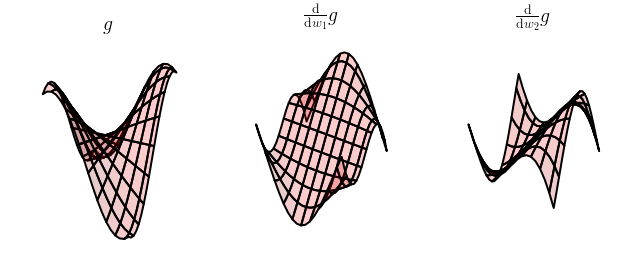

In [23]:
# define a function using our AD components
g = lambda w1,w2: sin(2*w1*w2)

# use custom plotter to evaluate function/derivative over a large range of inputs
calclib.derivative_3d_plotter.ad_3d_derval_plot(MyTuple,g)

# The reverse mode of automatic differentiation

The automatic differentiator we have been discussing so far operates in the forward mode, meaning that all function and derivative/gradient calculations are done in one sweep (the forward sweep) traversing the computational graph forward. Automatic differentiation can also be done in what is typically referred to as the reverse mode, consisting of a forward sweep and a backward sweep. The forward sweep of the reverse mode is essentially similar to the forward mode of AD in that the computational graph is traversed once in the forward direction, i.e, from left (input side) to right (output side). The only difference is that we no longer compute the full gradient at each node going forward through the graph (as was the case with the forward mode). Instead, we only compute and collect the partial derivatives of each parent with respect to its children during the forward sweep. Once the forward sweep is complete, we change course and go backwards through graph, visiting all nodes once more, precisely in the reverse order of the forward mode, this time  updating the partial derivatives computed at each node by multiplying each by the (relevant) partial derivative of its parent. When the backward sweep is completed, the derivative attribute of each input variable will contain the corresponding entry of the full gradient.          

#### <span style="color:#a50e3e;">Example 3. </span> Computing the gradient of a simple quadratic using the reverse mode

Starting the forward pass, we first visit node $a$ and compute the partial derivative of $a$ with respect to its only child, in this case $w_1$.

\begin{equation}
\frac{\partial}{\partial w_{1}}a = 2w_1
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/R_f_0.png" width="55%" height="auto"></p>

Next, we move on to node $b$ and compute its partial derivative with respect to its only child, $w_2$. 

\begin{equation}
\frac{\partial}{\partial w_{2}}b = 2w_2
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/R_f_1.png" width="55%" height="auto"></p>

Finally, we visit node $c=a+b$ where we compute its partial derivatives with respect to all its children, here $a$ and $b$.  

\begin{equation}
\frac{\partial}{\partial a}c = 1\\
\frac{\partial}{\partial b}c = 1
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/R_f_3.png" width="55%" height="auto"></p>

Once the forward pass is complete, we traverse the graph backwards, visiting each node in the reverse order.       

<p><img src="../../mlrefined_images/calculus_images/R_f_2.png" width="55%" height="auto"></p>

At every step of the process we update the partial derivative of each child by multiplying it by the partial derivative of the parent node with respect to that child. Starting from the last node in our forward sweep, i.e., node $c$, we observe that $c$ has two children: $a$ and $b$. Therefore we update the derivative at $a$ by (left) multiplying it by $\frac{\partial}{\partial a}c$, and similarly update the derivative at $b$ by (left) multiplying it by $\frac{\partial}{\partial b}c$.        

<p><img src="../../mlrefined_images/calculus_images/R_r_0.png" width="55%" height="auto"></p>

Following the reverse order of our backward sweep, the next node in the graph to visit is $w_2$ where its derivative (which is simply $1$) gets multiplied by the derivative of its parent $b$, giving 

\begin{equation}
\frac{\partial}{\partial b}c \frac{\partial}{\partial w_2}b \times 1
\end{equation}

<p><img src="../../mlrefined_images/calculus_images/R_r_1.png" width="55%" height="auto"></p>

Notice, this is precisely the partial derivative of $c$ with respect to $w_2$, or in other words, the second element of our desired gradient. To finish the backward sweep we finally visit node $w_1$ - at which forward sweep started - where  we multiply its derivative, i.e., $1$, by the derivative of its parent $a$

\begin{equation}
\frac{\partial}{\partial a}c \frac{\partial}{\partial w_1}a \times 1
\end{equation}

which is precisely $\frac{\partial}{\partial w_1}c$ or the first element of our desired gradient.  

<p><img src="../../mlrefined_images/calculus_images/R_r_2.png" width="55%" height="auto"></p>

## Which mode of auto-differentiator should one choose? 

Although both forward and reverse modes of auto-differentiator are valid to use for any cost function formed using elementary functions and operations, one of the two can be considerably more efficient than the other depending on the structure and number of inputs/outputs to the cost function. In general, the cost of the forward mode of AD is dependent on the number of input variables while that of the reverse mode is dependent on the number of output variables. Since the cost functions of interest in machine learning, and particularly deep learning, typically consist of a large number of input variables (sometimes in hundreds of millions) with only one or few output variables, it therefore makes practical sense to use the reverse mode of AD to avoid wastefully carrying extremely large and sparse gradients through the computational graph.        